Imports and Load dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS



df = pd.read_csv('netflix.csv')
print("Loaded netflix_titles.csv from local directory.")

Loaded netflix_titles.csv from local directory.


Explore and understand the dataset


In [ ]:

if df is not None:
    print('Shape:', df.shape)
    display(df.head())
    print('\nInfo:')
    display(df.info())
    print('\nDescribe (object cols included):')
    display(df.describe(include='all'))
else:
    print('Dataframe not loaded. Please load netflix_titles.csv and re-run.')


Shape: (6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


None


Describe (object cols included):


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


Content distribution analysis

Movies vs TV Shows counts:
 type
Movie      4265
TV Show    1969
Name: count, dtype: int64


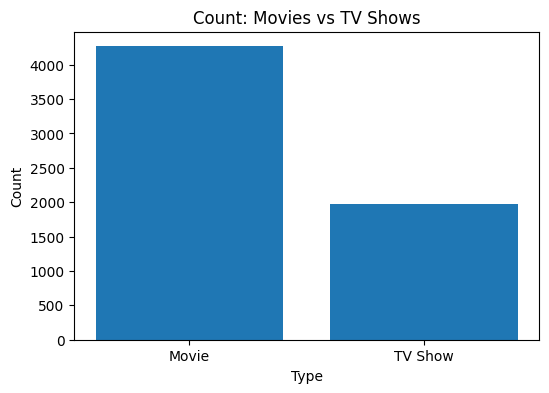


Top Ratings:


rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
Unknown       10
UR             7
NC-17          2
Name: count, dtype: int64

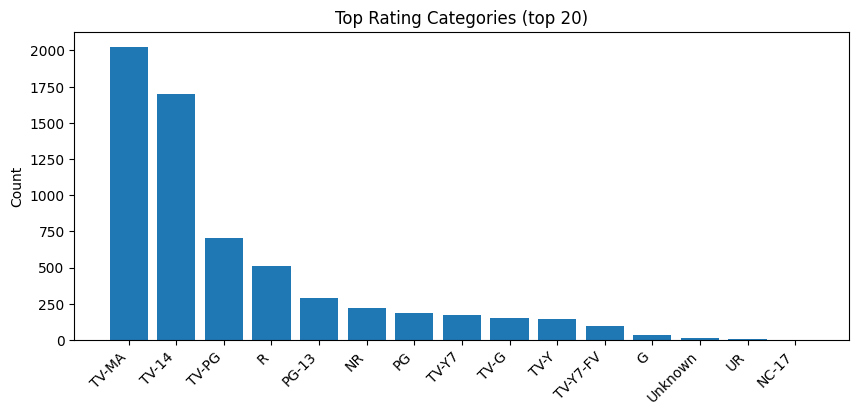


Top 20 countries by number of titles:


[('United States', 2610),
 ('India', 838),
 ('United Kingdom', 602),
 ('Canada', 318),
 ('France', 271),
 ('Japan', 231),
 ('Spain', 178),
 ('South Korea', 162),
 ('Germany', 151),
 ('Mexico', 129),
 ('Australia', 126),
 ('China', 120),
 ('Hong Kong', 97),
 ('Turkey', 87),
 ('Taiwan', 75),
 ('Argentina', 68),
 ('Italy', 67),
 ('Belgium', 66),
 ('Brazil', 66),
 ('Thailand', 56)]

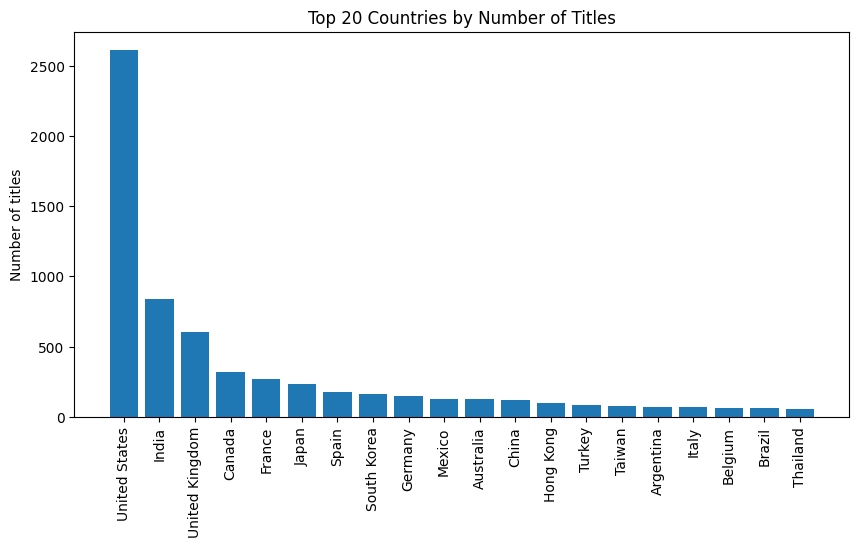

In [ ]:

if df is None:
    raise SystemExit('Load the dataset first.')

counts_type = df['type'].value_counts()
print('Movies vs TV Shows counts:\n', counts_type)

plt.figure(figsize=(6,4))
plt.bar(counts_type.index, counts_type.values)
plt.title('Count: Movies vs TV Shows')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

ratings = df['rating'].fillna('Unknown').value_counts().head(20)
print('\nTop Ratings:')
display(ratings)

plt.figure(figsize=(10,4))
plt.bar(ratings.index, ratings.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top Rating Categories (top 20)')
plt.ylabel('Count')
plt.show()

def split_and_count(series):
    counter = Counter()
    for val in series.dropna():
        parts = [p.strip() for p in str(val).split(',') if p.strip()]
        counter.update(parts)
    return counter

country_counts = split_and_count(df['country'])
top_countries = country_counts.most_common(20)
print('\nTop 20 countries by number of titles:')
display(top_countries)

countries, counts = zip(*top_countries)
plt.figure(figsize=(10,5))
plt.bar(countries, counts)
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Number of Titles')
plt.ylabel('Number of titles')
plt.show()


Time-based trend analysis

Top release years (by number of titles):


release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
Name: count, dtype: int64

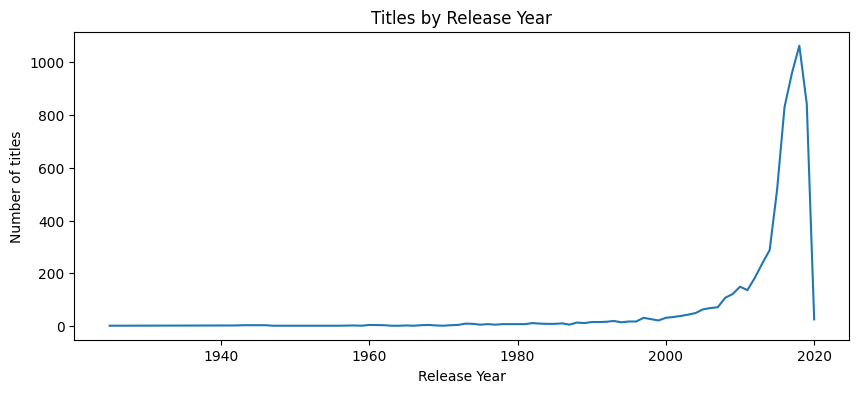


Titles added per year:


added_year
2011.0      13
2012.0       7
2013.0       9
2014.0      19
2015.0      74
2016.0     412
2017.0    1184
2018.0    1629
2019.0    2057
2020.0     174
Name: count, dtype: int64

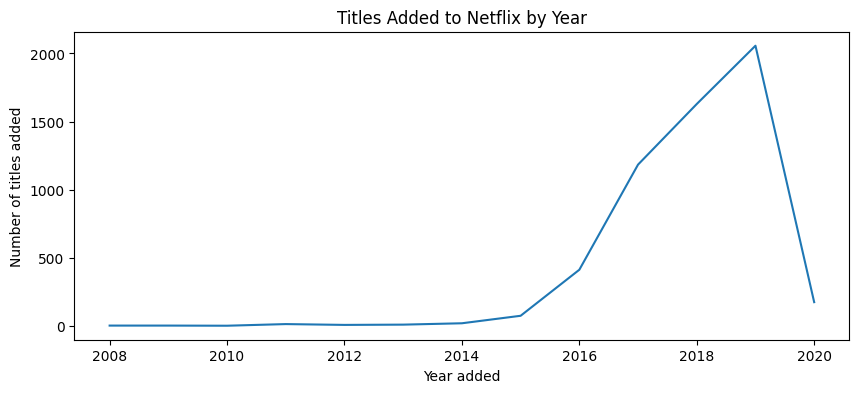

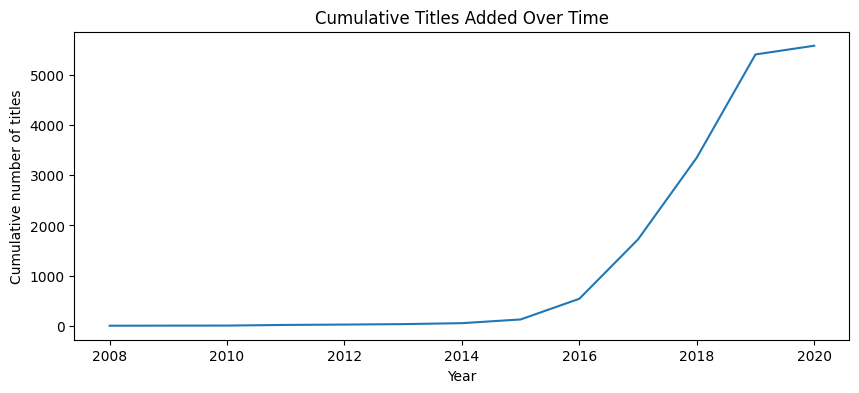

In [8]:

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')


release_counts = df['release_year'].value_counts().sort_index().dropna()
top_release = release_counts.sort_values(ascending=False).head(10)
print('Top release years (by number of titles):')
display(top_release)

plt.figure(figsize=(10,4))
plt.plot(release_counts.index, release_counts.values)
plt.title('Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of titles')
plt.show()


df['added_year'] = df['date_added_parsed'].dt.year
added_counts = df['added_year'].value_counts().sort_index().dropna()
print('\nTitles added per year:')
display(added_counts.tail(10))

plt.figure(figsize=(10,4))
plt.plot(added_counts.index, added_counts.values)
plt.title('Titles Added to Netflix by Year')
plt.xlabel('Year added')
plt.ylabel('Number of titles added')
plt.show()

added_cum = added_counts.cumsum()
plt.figure(figsize=(10,4))
plt.plot(added_cum.index, added_cum.values)
plt.title('Cumulative Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative number of titles')
plt.show()


Duration & Content Type Analysis

Movie durations stats:


count    4265.000000
mean       99.100821
std        28.074857
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: duration_minutes, dtype: float64

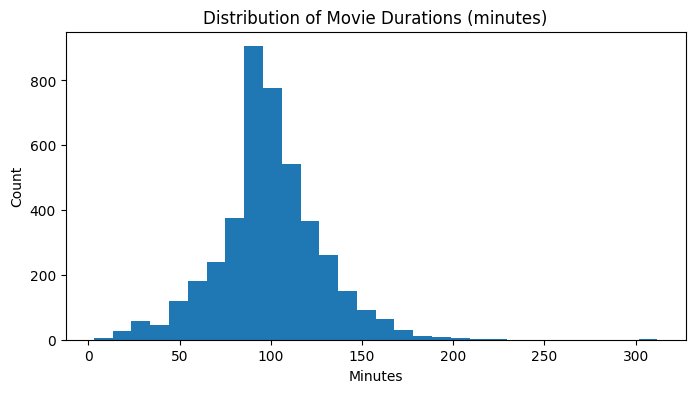


TV Shows by number of seasons:


seasons
1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
10       3
11       3
12       2
13       2
14       1
15       2
Name: count, dtype: int64

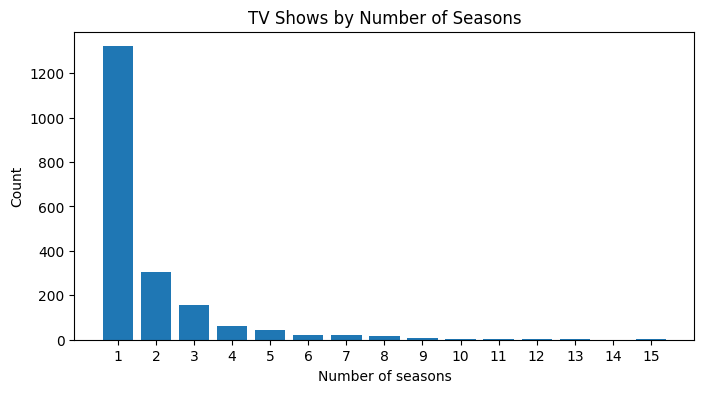

In [9]:

def extract_movie_minutes(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if 'min' in s:
        try:
            return int(s.replace('min','').strip())
        except:
            return np.nan
    return np.nan

df['duration_minutes'] = df['duration'].apply(extract_movie_minutes)

movie_durations = df[df['type']=='Movie']['duration_minutes'].dropna().astype(int)
print('Movie durations stats:')
display(movie_durations.describe())

plt.figure(figsize=(8,4))
plt.hist(movie_durations, bins=30)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()


def extract_seasons(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    if 'season' in s:
        try:
            return int(s.split()[0])
        except:
            return np.nan
    return np.nan

df['seasons'] = df['duration'].apply(extract_seasons)
tv_season_counts = df[df['type']=='TV Show']['seasons'].dropna().astype(int).value_counts().sort_index()
print('\nTV Shows by number of seasons:')
display(tv_season_counts.head(20))

plt.figure(figsize=(8,4))
plt.bar(tv_season_counts.index.astype(str), tv_season_counts.values)
plt.title('TV Shows by Number of Seasons')
plt.xlabel('Number of seasons')
plt.ylabel('Count')
plt.show()


Genre & Categories Analysis

Top 10 Genres:


[('International Movies', 1927),
 ('Dramas', 1623),
 ('Comedies', 1113),
 ('International TV Shows', 1001),
 ('Documentaries', 668),
 ('TV Dramas', 599),
 ('Action & Adventure', 597),
 ('Independent Movies', 552),
 ('TV Comedies', 436),
 ('Thrillers', 392)]

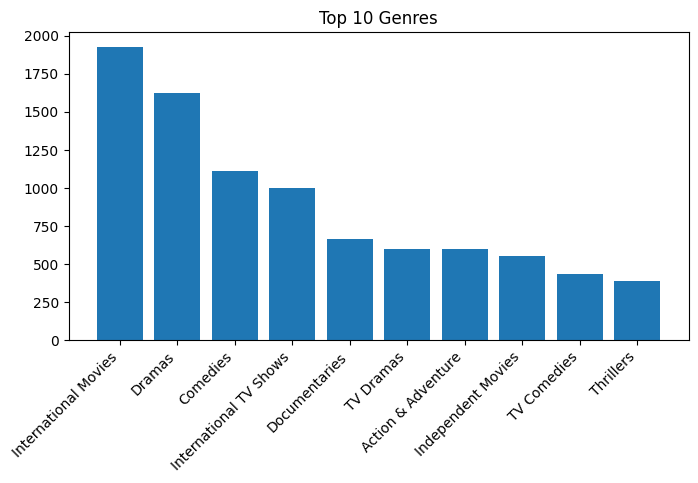


Top 10 Directors:


[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Jay Karas', 14),
 ('Marcus Raboy', 14),
 ('Jay Chapman', 12),
 ('Martin Scorsese', 9),
 ('Steven Spielberg', 9),
 ('Umesh Mehra', 8),
 ('Shannon Hartman', 8),
 ('Lance Bangs', 8)]


Top 15 Actors/Actors listed in cast:


[('Anupam Kher', 33),
 ('Shah Rukh Khan', 30),
 ('Naseeruddin Shah', 27),
 ('Om Puri', 27),
 ('Akshay Kumar', 26),
 ('Yuki Kaji', 26),
 ('Takahiro Sakurai', 25),
 ('Paresh Rawal', 25),
 ('Amitabh Bachchan', 24),
 ('Boman Irani', 23),
 ('Andrea Libman', 22),
 ('Ashleigh Ball', 22),
 ('John Cleese', 22),
 ('Kareena Kapoor', 19),
 ('Tara Strong', 18)]

In [11]:


def split_and_count(series):
    from collections import Counter
    counter = Counter()
    for val in series.dropna():
        parts = [p.strip() for p in str(val).split(',') if p.strip()]
        counter.update(parts)
    return counter

genre_counts = split_and_count(df['listed_in'])
top_genres = genre_counts.most_common(10)
print('Top 10 Genres:')
display(top_genres)

genres, gcounts = zip(*top_genres)
plt.figure(figsize=(8,4))
plt.bar(genres, gcounts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Genres')
plt.show()


director_counts = split_and_count(df['director'])
print('\nTop 10 Directors:')
display(director_counts.most_common(10))



actor_counts = split_and_count(df['cast'])
print('\nTop 15 Actors/Actors listed in cast:')
display(actor_counts.most_common(15))


Most common words in the description (Word Cloud)

In [12]:


if 'WordCloud' in globals() and WordCloud is not None:
    descriptions = df['description'].dropna().str.cat(sep=' ')
    stopwords = set(STOPWORDS) if 'STOPWORDS' in globals() else set()
    wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(descriptions)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Descriptions')
    plt.show()
else:
    print('WordCloud library not available. Install `wordcloud` to generate the visualization.')


WordCloud library not available. Install `wordcloud` to generate the visualization.


Months with most content additions

Titles added by month:


added_month
December     638
October      580
January      563
November     544
March        504
August       454
September    420
July         413
April        406
May          380
February     342
June         339
Name: count, dtype: int64

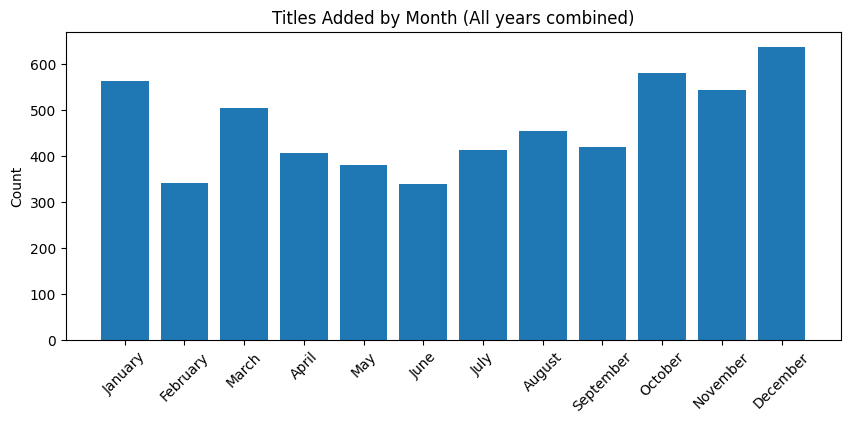

In [13]:

df['added_month'] = df['date_added_parsed'].dt.month_name()
month_counts = df['added_month'].value_counts().dropna()
print('Titles added by month:')
display(month_counts)

plt.figure(figsize=(10,4))
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
counts_ordered = [month_counts.get(m,0) for m in months_order]
plt.bar(months_order, counts_ordered)
plt.xticks(rotation=45)
plt.title('Titles Added by Month (All years combined)')
plt.ylabel('Count')
plt.show()


Countries producing more Movies vs TV Shows

type,Movie,TV Show,Total
country,,,
United States,1924,686,2610
India,783,55,838
United Kingdom,379,223,602
Canada,211,107,318
France,201,70,271
Japan,75,156,231
Spain,133,45,178
South Korea,46,116,162
Germany,126,25,151


<Figure size 1000x600 with 0 Axes>

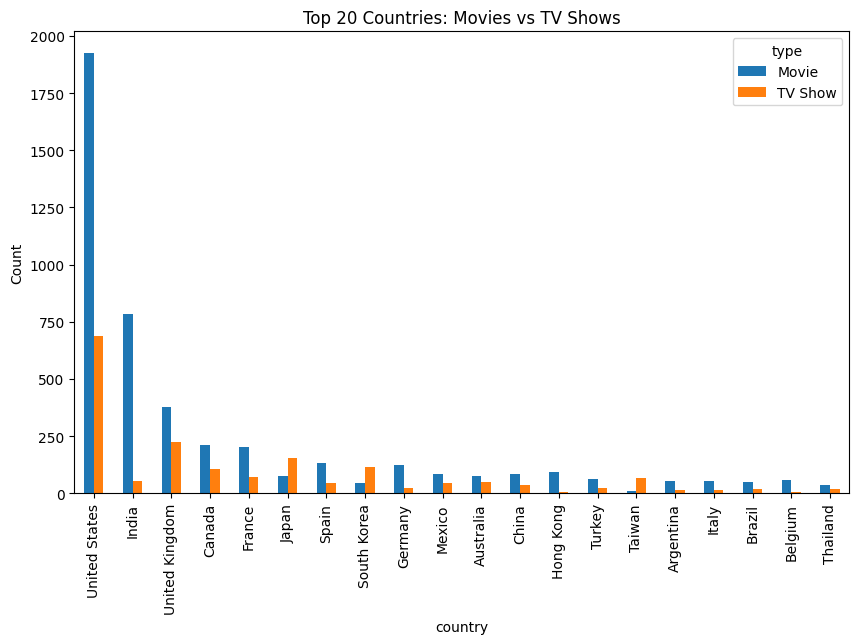

In [14]:


country_type = []
for _, row in df[['country','type']].dropna().iterrows():
    countries = [c.strip() for c in str(row['country']).split(',') if c.strip()]
    for c in countries:
        country_type.append((c, row['type']))

ct_df = pd.DataFrame(country_type, columns=['country','type'])
pivot = ct_df.pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)
pivot['Total'] = pivot.sum(axis=1)
pivot_sorted = pivot.sort_values(by='Total', ascending=False).head(20)
display(pivot_sorted)

plt.figure(figsize=(10,6))
pivot_sorted[['Movie','TV Show']].plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Top 20 Countries: Movies vs TV Shows')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Most common ratings for Movies vs TV Shows

Top ratings for Movies:


rating
TV-MA    1348
TV-14    1038
R         506
TV-PG     432
PG-13     286
NR        202
PG        183
TV-G       80
TV-Y7      69
TV-Y       41
Name: Movie, dtype: int64


Top ratings for TV Shows:


rating
TV-MA       679
TV-14       660
TV-PG       269
TV-Y        102
TV-Y7       100
TV-G         69
TV-Y7-FV     68
NR           16
R             2
G             1
Name: TV Show, dtype: int64

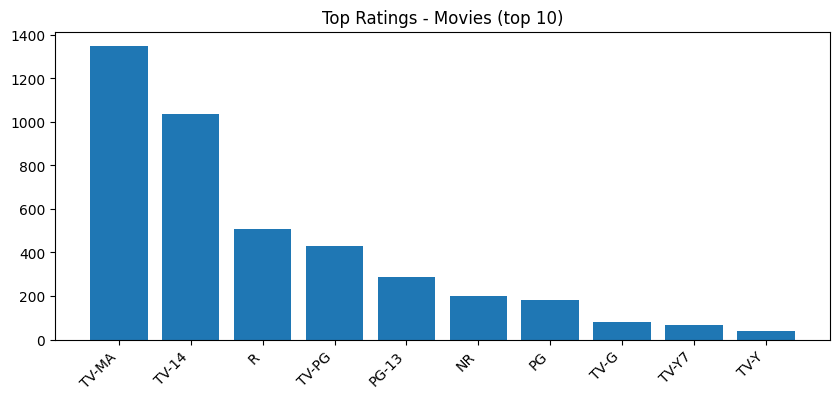

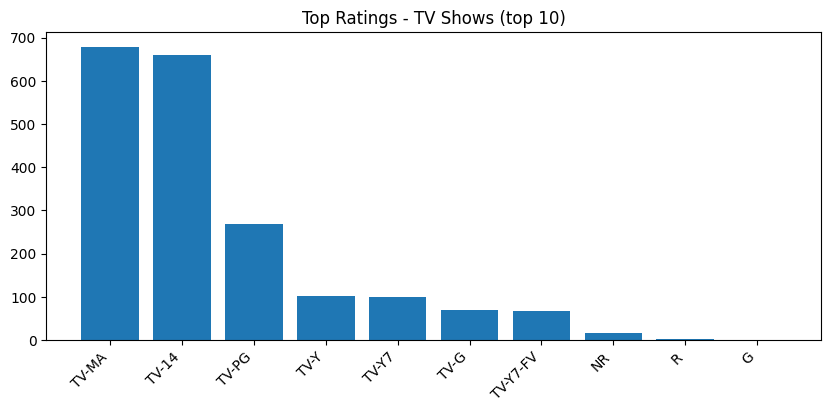

In [15]:

rating_type = df.groupby(['type','rating']).size().unstack(fill_value=0)
if 'Movie' in rating_type.index:
    top_ratings_movies = rating_type.loc['Movie'].sort_values(ascending=False).head(10)
else:
    top_ratings_movies = pd.Series(dtype=int)
if 'TV Show' in rating_type.index:
    top_ratings_tv = rating_type.loc['TV Show'].sort_values(ascending=False).head(10)
else:
    top_ratings_tv = pd.Series(dtype=int)

print('Top ratings for Movies:')
display(top_ratings_movies)
print('\nTop ratings for TV Shows:')
display(top_ratings_tv)

plt.figure(figsize=(10,4))
if not top_ratings_movies.empty:
    plt.bar(top_ratings_movies.index.astype(str), top_ratings_movies.values)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Ratings - Movies (top 10)')
    plt.show()

plt.figure(figsize=(10,4))
if not top_ratings_tv.empty:
    plt.bar(top_ratings_tv.index.astype(str), top_ratings_tv.values)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Ratings - TV Shows (top 10)')
    plt.show()
